In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
raw_data = pd.read_csv('dummy.csv')

In [4]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [5]:
# we can see that we have categorical variable and we need to convert it to 0 or 1 
raw_data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [6]:
data = raw_data.copy()

In [7]:
data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [8]:
data['Attendance'] = data['Attendance'].map({'Yes':1,'No':0})

In [9]:
x1 = data[['SAT','Attendance']]
y = data['GPA']

In [10]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [20]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [12]:
# our equation will be if attendance = 1 => y = 0.6439 + 0.0014*data['SAT'] + 0.2226*1 => 0.8665 + 0.0014*data['SAT']
# our equation will be if attendance = 0 => y = 0.6439 + 0.0014*data['SAT']


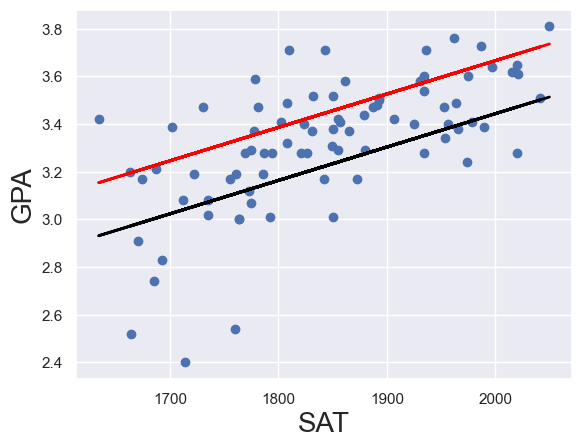

In [13]:
plt.scatter(data['SAT'],y)
y_with_0  = 0.6439 + 0.0014*data['SAT']
y_with_1 = 0.8665 + 0.0014*data['SAT']
fig = plt.plot(data['SAT'],y_with_0,lw = 2, c = 'black')
fig = plt.plot(data['SAT'],y_with_1,lw = 2 , c = 'red')
plt.xlabel('SAT',fontsize = 20)
plt.ylabel('GPA',fontsize = 20)
plt.show()

In [14]:
# we can notice that our line for those who attended is higher than the who didnt attend , also we can notice that out intercept who attended is higher



In [15]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [18]:
new_data = pd.DataFrame({'const':1,'SAT':[1700,1670],'Attendance':[0,1]})

In [17]:
new_data.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [21]:
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [27]:
another_new_data = pd.DataFrame({'const':1,'SAT':[1245,1500],'Attendance':[1,1]})
another_new_data.rename(index = {0:'Eldos',1:'Zhandos'})
# получается мы можем просто построить новую таблицу и потом написать все значения да функция rename нам нужна для того чтобы изменить навзвание индексов 

,const,SAT,Attendance
Eldos,1,1245,1
Zhandos,1,1500,1


In [28]:
result_for_new_data = result.predict(another_new_data)

In [29]:
result_for_new_data

0    2.609247
1    2.966197
dtype: float64

In [32]:
table = pd.DataFrame({' Result of GPA':result_for_new_data})

In [33]:
table

,Result of GPA
0,2.609247
1,2.966197


In [34]:
table.rename(index = {0:'Eldos',1:'Zhandos'})

,Result of GPA
Eldos,2.609247
Zhandos,2.966197
